In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("emotion_dataset_raw.csv")

In [4]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [5]:
df.columns

Index(['Emotion', 'Text'], dtype='object')

In [6]:
df.shape

(34792, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  34792 non-null  object
 1   Text     34792 non-null  object
dtypes: object(2)
memory usage: 543.8+ KB


In [8]:
#checking the null values
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [9]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

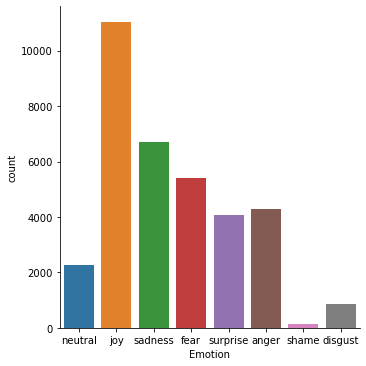

In [10]:
sns.catplot(x='Emotion',kind='count',data=df)
plt.savefig('a.png')

Here in this bar we can observe that we have joy emotion data above 10000, so while training our pipeline it while analyze joy data and we 
can get maximum testing data as joy even if the actual value is not joy.

In [11]:
import nltk

#pip install neattext
#install neattext using the above command

In [12]:
import neattext.functions as nfx

In [13]:
# Data Cleaning
dir(nfx)
# User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [14]:
df

,Emotion,Text,Clean_Text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,anger,A man robbed me today .,man robbed today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


In [15]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.2,random_state=42)

In [18]:
#Importing classification algorithms for ML pipeline
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [19]:
#Importing transformers and classification metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report

In [20]:
# Build Pipeline
from sklearn.pipeline import Pipeline

# 1.XGBOOST 

In [21]:
# XGboost Pipeline
pipe_xgb = Pipeline(steps=[('cv',CountVectorizer()),('xbg',XGBClassifier())])

In [22]:
# Train and Fit Data
pipe_xgb.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('xbg',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [23]:
pred_xgb = pipe_xgb.predict(x_test)

In [24]:
xgb_acc = accuracy_score(y_test, pred_xgb)
print(xgb_acc)

0.5747952291995977


In [25]:
print('Classification Report')
print(classification_report(y_test,pred_xgb))

Classification Report
              precision    recall  f1-score   support

       anger       0.75      0.45      0.57       836
     disgust       0.67      0.19      0.29       202
        fear       0.86      0.53      0.66      1104
         joy       0.47      0.90      0.61      2214
     neutral       0.64      0.18      0.28       481
     sadness       0.69      0.48      0.56      1327
       shame       0.85      0.96      0.90        23
    surprise       0.70      0.34      0.46       772

    accuracy                           0.57      6959
   macro avg       0.70      0.50      0.54      6959
weighted avg       0.65      0.57      0.56      6959



In [26]:
#Make Prediction
ex1 = "Take this gift"

In [27]:
pipe_xgb.predict([ex1])

array(['surprise'], dtype=object)

# 2. Random Forest classifier

In [28]:
# Random Forest Pipeline
pipe_rf = Pipeline(steps=[('cv',CountVectorizer()),('rf',RandomForestClassifier(max_depth=15, random_state=9, n_estimators=100))])

In [29]:
# Train and Fit Data
pipe_rf.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('rf', RandomForestClassifier(max_depth=15, random_state=9))])

In [30]:
pred_rf = pipe_rf.predict(x_test)

In [31]:
rf_acc = accuracy_score(y_test, pred_rf)
print(rf_acc)

0.3496191981606553


In [32]:
print('Classification Report')
print(classification_report(y_test,pred_rf))

Classification Report
              precision    recall  f1-score   support

       anger       1.00      0.00      0.01       836
     disgust       0.00      0.00      0.00       202
        fear       1.00      0.07      0.13      1104
         joy       0.33      1.00      0.49      2214
     neutral       0.00      0.00      0.00       481
     sadness       0.93      0.05      0.10      1327
       shame       0.00      0.00      0.00        23
    surprise       0.97      0.09      0.17       772

    accuracy                           0.35      6959
   macro avg       0.53      0.15      0.11      6959
weighted avg       0.67      0.35      0.22      6959



In [33]:
#Make Prediction
ex2 = "I am going to his funeral"
pipe_xgb.predict([ex2])

array(['sadness'], dtype=object)

# 3. AdaBoost Classifier

In [34]:
#AdaBoost Pipeline
pipe_ada =  Pipeline(steps=[('cv',CountVectorizer()),('ada',AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=10, learning_rate=0.01))])

In [35]:
# Train and Fit Data
pipe_ada.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('ada',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                    learning_rate=0.01, n_estimators=10))])

In [36]:
pred_ada = pipe_ada.predict(x_test)

In [37]:
ada_acc = accuracy_score(y_test, pred_ada)
print(ada_acc)

0.5581261675528093


In [38]:
print('Classification Report')
print(classification_report(y_test,pred_ada))

Classification Report
              precision    recall  f1-score   support

       anger       0.57      0.53      0.55       836
     disgust       0.45      0.15      0.23       202
        fear       0.76      0.62      0.68      1104
         joy       0.60      0.65      0.62      2214
     neutral       0.34      0.73      0.46       481
     sadness       0.53      0.50      0.51      1327
       shame       0.83      0.87      0.85        23
    surprise       0.51      0.34      0.41       772

    accuracy                           0.56      6959
   macro avg       0.57      0.55      0.54      6959
weighted avg       0.58      0.56      0.56      6959



In [39]:
#Make Prediction
ex3 = "oh my God! What is this?"
pipe_ada.predict([ex3])

array(['sadness'], dtype=object)

# 4. KNN 

In [40]:
#KNN pipeline
pipe_knn =  Pipeline(steps=[('cv',CountVectorizer()),('knn',KNeighborsClassifier(n_neighbors=5))])

In [41]:
# Train and Fit Data
pipe_knn.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('knn', KNeighborsClassifier())])

In [42]:
pred_knn = pipe_knn.predict(x_test)

In [43]:
knn_acc = accuracy_score(y_test, pred_knn)
print(knn_acc)

0.23523494754993535


In [44]:
print('Classification Report')
print(classification_report(y_test,pred_knn))

Classification Report
              precision    recall  f1-score   support

       anger       0.39      0.15      0.21       836
     disgust       0.33      0.01      0.02       202
        fear       0.68      0.24      0.35      1104
         joy       0.63      0.26      0.37      2214
     neutral       0.09      0.94      0.17       481
     sadness       0.65      0.15      0.24      1327
       shame       0.00      0.00      0.00        23
    surprise       0.54      0.03      0.07       772

    accuracy                           0.24      6959
   macro avg       0.41      0.22      0.18      6959
weighted avg       0.55      0.24      0.26      6959



In [45]:
#Make Prediction
ex4 = "They sound like cats and dogs"
pipe_xgb.predict([ex4])

array(['joy'], dtype=object)

In [46]:
ex5="What the hell is this"
pipe_xgb.predict([ex5])

array(['joy'], dtype=object)

Knn is giving us worng prediction there can be 2 reason:
    1: Accuracy is less
    2: Our model is overfitted with "joy" emotion

So, now we will use bagging technique to improve our KNN model

# 6. Bagging Classifier

In [47]:
#Bagging Pipeline
pipe_bg = Pipeline(steps=[('cv',CountVectorizer()),('bg', BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=5)))])

In [48]:
# Train and Fit Data
pipe_bg.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('bg',
                 BaggingClassifier(base_estimator=KNeighborsClassifier()))])

In [49]:
pred_bg = pipe_bg.predict(x_test)

In [50]:
bg_acc = accuracy_score(y_test, pred_bg)
print(bg_acc)

0.21540451214254921


In [51]:
print('Classification Report')
print(classification_report(y_test,pred_bg))

Classification Report
              precision    recall  f1-score   support

       anger       0.49      0.08      0.14       836
     disgust       1.00      0.01      0.02       202
        fear       0.71      0.23      0.35      1104
         joy       0.70      0.21      0.32      2214
     neutral       0.09      0.96      0.16       481
     sadness       0.62      0.16      0.26      1327
       shame       0.00      0.00      0.00        23
    surprise       0.50      0.04      0.07       772

    accuracy                           0.22      6959
   macro avg       0.51      0.21      0.16      6959
weighted avg       0.60      0.22      0.24      6959



So, Bagging method didn't improve our model

In [52]:
#Make Prediction
ex6 = "He have no intrest"
pipe_xgb.predict([ex6])

array(['joy'], dtype=object)

Still worng Prediction

# 6. Logistics Regression

In [53]:
# LR Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression(max_iter = 10000))])

In [54]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', LogisticRegression(max_iter=10000))])

In [55]:
pred_lr = pipe_lr.predict(x_test)

In [56]:
lr_acc = accuracy_score(y_test, pred_lr)
print(lr_acc)

0.6309814628538584


In [57]:
print('Classification Report')
print(classification_report(y_test,pred_lr))

Classification Report
              precision    recall  f1-score   support

       anger       0.61      0.56      0.58       836
     disgust       0.56      0.19      0.28       202
        fear       0.76      0.67      0.71      1104
         joy       0.63      0.76      0.69      2214
     neutral       0.61      0.73      0.67       481
     sadness       0.59      0.58      0.59      1327
       shame       0.81      0.74      0.77        23
    surprise       0.56      0.42      0.48       772

    accuracy                           0.63      6959
   macro avg       0.64      0.58      0.60      6959
weighted avg       0.63      0.63      0.62      6959



In [58]:
#Make Prediction
ex7 = "For this project had to skip gym today"
pipe_lr.predict([ex7])

array(['sadness'], dtype=object)

# Comparison among all the models

In [59]:
Comparison_results = pd.DataFrame({
    "Model":["XGBoost","Random_Forst_Clasifier","AdaBoost_Classifier",
            "KNN","Bagging_KNN","LogisticRegression"],
    
     "Accuracy_Score":[xgb_acc,rf_acc,ada_acc,knn_acc,bg_acc,lr_acc]
    })
Comparison_results

,Model,Accuracy_Score
0,XGBoost,0.574795
1,Random_Forst_Clasifier,0.349619
2,AdaBoost_Classifier,0.558126
3,KNN,0.235235
4,Bagging_KNN,0.215405
5,LogisticRegression,0.630981


In [60]:
Plot_results1 = Comparison_results.set_index("Model")
Plot_results2 = Plot_results1.sort_values(by="Accuracy_Score", ascending=False)

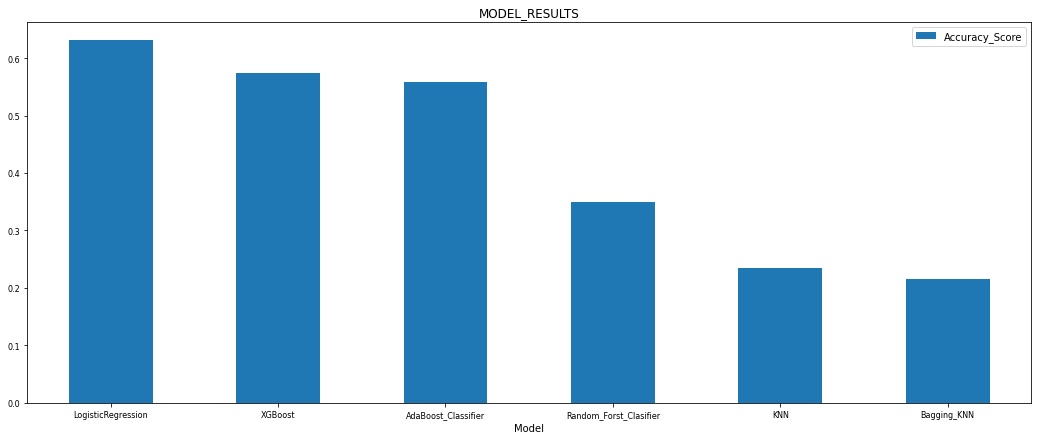

In [61]:
Plot_ax = Plot_results2.plot(kind='bar', title ="MODEL_RESULTS", figsize=(18,7), legend=True, rot=0, fontsize=8)
plt.savefig('Comparative Analysis.png')
plt.show()

So, Logistics Regression accuracy is better than other classification model